**RAHUL KHARE**

**52010079**

**MCA 4TH SEM**

**DATA ANALYTICS**

**KNN ASSIGNMENT**


---




# **Importing Libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Importing the Dataset**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [ ]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Preprocessing**

In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# **Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# **Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Training and Predictions**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

# **Evaluating the Algorithm**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0 12  2]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.86      0.92        14
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30



# **Cross validation score**

**X fold cross validation**

1. Split the data into X equal paritions / folds

2. use fold 1 as the test set and the (X-1) folds as train set

3.  Calculate test accuracy

4.  Repeat these steps 2, 3 for X times

5. Use the average of all these X testing accuracies as the estimate of sample accuracy

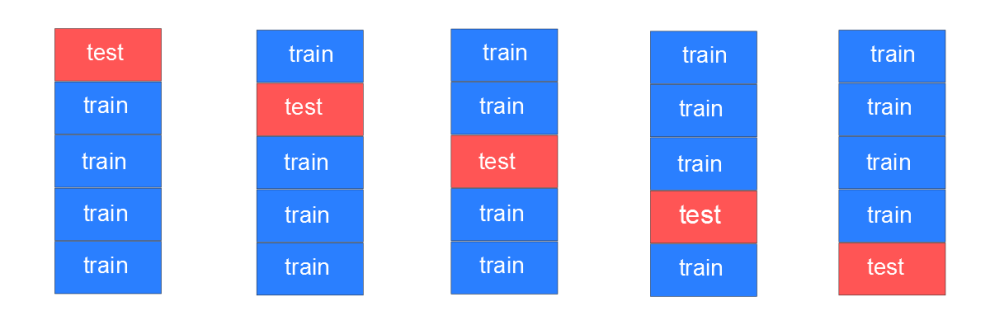

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 5)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores = cross_val_score(knn, X, y , cv = 5, scoring= 'accuracy')

In [ ]:
print(scores)

[0.96666667 1.         0.93333333 0.96666667 1.        ]


In [ ]:
print(scores.mean())

0.9733333333333334


In [ ]:
k_range = range(1, 41)
k_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors= k)
  scores = cross_val_score(knn, X, y , cv = 5, scoring= 'accuracy')
  k_scores.append(scores.mean())

In [ ]:
k_scores

[0.96,
 0.9466666666666665,
 0.9666666666666668,
 0.9733333333333334,
 0.9733333333333334,
 0.9800000000000001,
 0.9800000000000001,
 0.9666666666666668,
 0.9733333333333334,
 0.9800000000000001,
 0.9800000000000001,
 0.9800000000000001,
 0.9733333333333334,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666668,
 0.9666666666666666,
 0.9666666666666668,
 0.96,
 0.9666666666666668,
 0.96,
 0.96,
 0.9466666666666667,
 0.96,
 0.9466666666666665,
 0.9466666666666667,
 0.9399999999999998,
 0.9333333333333332,
 0.9399999999999998,
 0.9333333333333332,
 0.9466666666666665,
 0.9399999999999998,
 0.9533333333333334,
 0.9533333333333334,
 0.9533333333333334,
 0.9466666666666667,
 0.9333333333333333,
 0.9400000000000001,
 0.9266666666666667]

In [ ]:
import seaborn as sn

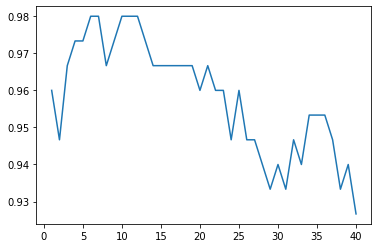

In [ ]:
sn.lineplot(x = k_range, y = k_scores);

# **Highest accuracy at k = 6, 7, 10, 11, 12**

# **and it is 0.9800000000000001**

# **Using 5 fold Cross validation**